In [1]:
import pickle
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image

In [2]:
class_labels = ['__background__', 'bush', 'kite', 'laptop', 'bear', 'paper', 'shoe', 'chair', 'ground', 'flowers', 'tire',
 'cup', 'sky', 'bench', 'window', 'bike', 'board', 'hat', 'plate', 'woman', 'handle', 'food', 'trees', 'wave',
 'giraffe', 'background', 'foot', 'shadow', 'clouds', 'button', 'shelf', 'bag', 'sand', 'nose', 'rock', 'sidewalk',
 'glasses', 'fence', 'people', 'house', 'sign', 'hair', 'street', 'zebra', 'mirror', 'logo', 'girl', 'arm', 'flower',
 'leaf', 'clock', 'dirt', 'lights', 'boat', 'bird', 'pants', 'umbrella', 'bed', 'leg', 'reflection', 'water', 'tracks',
 'sink', 'trunk', 'post', 'box', 'boy', 'cow', 'shoes', 'leaves', 'skateboard', 'pillow', 'road', 'letters', 'wall',
 'jeans', 'number', 'pole', 'table', 'writing', 'cloud', 'sheep', 'horse', 'eye', 'top', 'seat', 'tail', 'vehicle', 'brick',
 'legs', 'banana', 'head', 'door', 'shorts', 'bus', 'motorcycle', 'glass', 'flag', 'train', 'child', 'line', 'ear', 'neck',
 'car', 'cap', 'tree', 'roof', 'cat', 'coat', 'grass', 'toilet', 'player', 'airplane', 'glove', 'helmet', 'shirt', 'floor', 'bowl',
 'snow', 'field', 'lamp', 'elephant', 'tile', 'beach', 'pizza', 'wheel', 'picture', 'plant', 'ball', 'spot', 'hand', 'plane', 'mouth',
 'stripe', 'letter', 'vase', 'man', 'building', 'surfboard', 'windows', 'light', 'counter', 'lines', 'dog', 'face', 'jacket',
 'person', 'part', 'truck', 'bottle', 'wing']
assert len(class_labels) == 151

Given an image folder path `../data/flickr_mini`, it loads an image under that folder with its associated features (e.g. boxes) under `../data/flickr_mini/features`. 

In [3]:
image_folder = os.path.join('../data/flickr_mini/')
image_index = pickle.load(open(os.path.join(image_folder, 'features/meta.pkl'), 'rb'))['imdb_image_index']

In [4]:
image_idx = 2
print("Filename: %s"%(image_index[image_idx]))

im = Image.open(os.path.join(image_folder, image_index[image_idx] + '.jpg'))
im_feature = pickle.load(open(os.path.join(image_folder, 'features', image_index[image_idx] + '.pkl'), 'rb'))
boxes = np.array(im_feature['boxes'])

Filename: 1001896054


In [5]:
boxes[:10, :]

array([[2.56398712e+02, 1.60848007e+02, 3.67310883e+02, 3.13685608e+02,
        1.00000000e+01, 6.58098638e-01],
       [2.03320435e+02, 4.71106758e+01, 2.83728943e+02, 1.42000793e+02,
        1.36000000e+02, 6.14389002e-01],
       [3.89036636e+01, 2.26698853e+02, 1.37777130e+02, 3.26921356e+02,
        1.00000000e+01, 5.66654325e-01],
       [1.04437828e+02, 7.13027649e+01, 4.67416779e+02, 3.07387238e+02,
        9.50000000e+01, 5.21005929e-01],
       [2.11030945e+02, 8.33041687e+01, 2.79883850e+02, 1.28051819e+02,
        1.15000000e+02, 5.02118528e-01],
       [1.14629059e+01, 7.78654404e+01, 2.58424591e+02, 3.10967133e+02,
        1.48000000e+02, 4.95024204e-01],
       [2.50377560e+01, 2.20096008e+02, 1.44155792e+02, 3.32444092e+02,
        1.25000000e+02, 4.28882688e-01],
       [2.24455032e+02, 5.21502151e+01, 2.64780579e+02, 8.90844421e+01,
        9.10000000e+01, 4.24394935e-01],
       [4.18826813e+02, 4.38203812e+01, 4.89752197e+02, 1.25071075e+02,
        1.05000000e+02, 

In [6]:
_boxes = boxes
_class_labels = class_labels
_num_boxes_show = 3 # top 3 most confident boxes

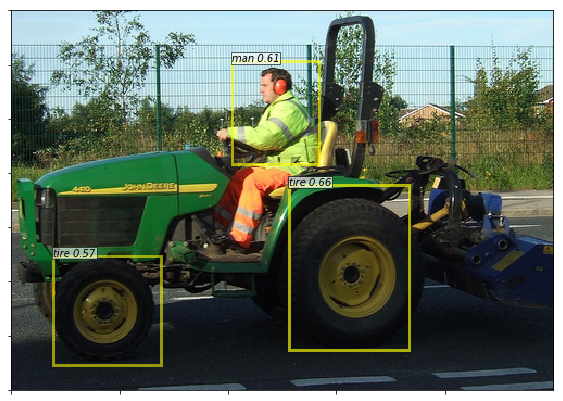

In [7]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.imshow(im)
ax = plt.gca()

# plot predicted boxes
for _region in _boxes[:_num_boxes_show]:
    x1, y1, x2, y2, class_id, score = _region
    x = x1; y = y1; w = x2 - x1; h = y2 - y1

    ax.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor='yellow', linewidth=3, alpha=score))
    ax.text(x, y, _class_labels[int(class_id)] + " %.2f"%(score), style='italic', bbox={'facecolor':'white', 'alpha':score, 'pad':1})

fig = plt.gcf()
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()